# One-hot encoding

## sklearn의 OneHotEncoder 사용
- 입력 값으로 2차원 데이터가 필요하다.
- 원-핫 인코딩의 결과는 밀집 행렬(Dense Matrix)이기 때문에 다시 희소 행렬(Parse Matrix)로 변환해야 한다.

In [3]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

maker = ['Samsung','LG','Apple','Sony']
maker = np.array(maker).reshape(-1,1) # np의 다차원 배열로 바꿔줌 
print(maker)

encoder = OneHotEncoder()
encoder.fit(maker)
one_hot = encoder.transform(maker)

print('원-핫 인코딩 결과(밀집행렬)')
print(one_hot)
print('원-핫 인코딩 결과(희소행렬)')
print(one_hot.toarray())

[['Samsung']
 ['LG']
 ['Apple']
 ['Sony']]
원-핫 인코딩 결과(밀집행렬)
  (0, 2)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 3)	1.0
원-핫 인코딩 결과(희소행렬)
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


### OneHotEncoder 결과 데이터 프레임에 적용

In [5]:
import pandas as pd
df = pd.DataFrame({'maker':['Samsung','LG','Apple','Sony']})
encoded = OneHotEncoder().fit_transform(df['maker'].values.reshape(-1,1))
encoded = encoded.toarray().astype(int)
# 컬럼 명은 알파벳 순으로 정렬해야 한다.
df[['maker-apple','maker-lg','maker-samsaung','maker-sony']] = encoded
print(df)

     maker  maker-apple  maker-lg  maker-samsaung  maker-sony
0  Samsung            0         0               1           0
1       LG            0         1               0           0
2    Apple            1         0               0           0
3     Sony            0         0               0           1


## pandas의 get_dummies() 사용

In [7]:
df = pd.DataFrame({'maker':['Samsung', 'LG', 'Apple', 'Sony']})
result = pd.get_dummies(df, columns=['maker'])
print(result)

   maker_Apple  maker_LG  maker_Samsung  maker_Sony
0        False     False           True       False
1        False      True          False       False
2         True     False          False       False
3        False     False          False        True


# Label encoding

## sklearn의 LabelEncoder 사용

In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

language = ['Java','Python','C#','Pascal']
df = pd.DataFrame({'Language':language})
display(df)
encoded = LabelEncoder().fit_transform(language)
print('라벨 인코딩 결과')
print(encoded)
df['Language'] = encoded
display(df)

,Language
0,Java
1,Python
2,C#
3,Pascal


라벨 인코딩 결과
[1 3 0 2]


,Language
0,1
1,3
2,0
3,2


## pandas의 map() 사용

In [11]:
language = ['Java','Python','C#','Pascal']
df = pd.DataFrame({'Language':language})
map_data = { v:i for i,v in enumerate(np.sort(df['Language'].unique()))}
df['Language'] = df['Language'].map(map_data)
print(df)

   Language
0         1
1         3
2         0
3         2


# 데이터 스케일링

## 표준화 (Standardization)

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
print(type(iris))
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# display(iris_df)
print('컬럼 평균')
print(iris_df.mean())
print()
print('컬럼 표준편차')
print(iris_df.std())

<class 'sklearn.utils._bunch.Bunch'>
컬럼 평균
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

컬럼 표준편차
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris.feature_names)
display(iris_scaled_df)
print('표준화된 컬럼 평균')
print(iris_scaled_df.mean())
print()
print('표준화된 컬럼 표준편차')
print(iris_scaled_df.std())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


표준화된 컬럼 평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

표준화된 컬럼 표준편차
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


## 표준화를 통한 이상치 데이터 처리
- 이상치 데이터 확인
- 최대값, 최소값 범위를 벗어나는 값을 이상치 데이터로 간주한다.

(95,)


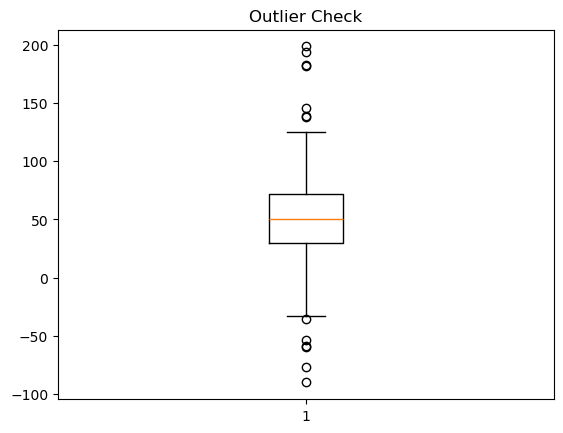

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

# 데이터 생성
spread = np.random.rand(50) * 100 # [0,100) 사이의 값 50개
center = np.ones(25) * 50 # 50(중앙값) 25개
flier_high = np.random.rand(10) * 100 + 100 # [100, 200) 사이의 값 10개
flier_low = np.random.rand(10) * -100 # (-100, 0] 사이의 값 10개

data = np.concatenate([spread, center, flier_high, flier_low])
print(data.shape)

plt.boxplot(data)
plt.title('Outlier Check')
plt.show()

std.dev(StandardScaler) : 1.00
mean(StandardScaler): -0.00
std.dev(RobustScaler) : 1.23
mean(RobustScaler): 0.02


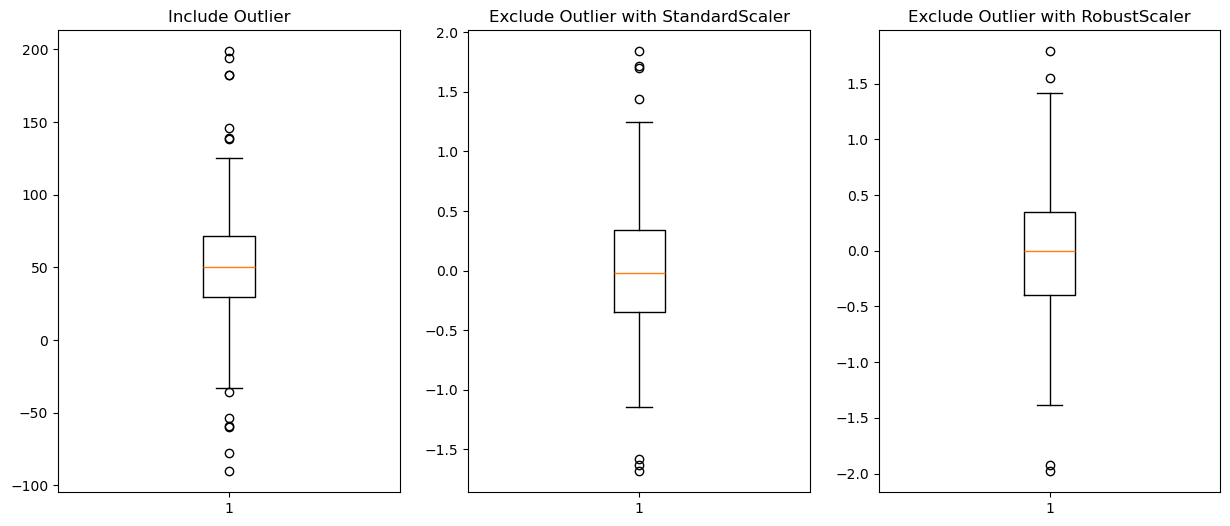

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler

data1 = StandardScaler().fit_transform(data.reshape(-1,1))
data2 = RobustScaler().fit_transform(data.reshape(-1,1))

print(f'std.dev(StandardScaler) : {np.std(data1):.2f}')
print(f'mean(StandardScaler): {np.mean(data1):.2f}')
print(f'std.dev(RobustScaler) : {np.std(data2):.2f}')
print(f'mean(RobustScaler): {np.mean(data2):.2f}')

# 표준화한 z-score가 (+/-)2sigma 안에 있으면 95%의 신뢰구간 내에 있다고 간주
# 이 데이터만 선택하면 이상치를 제거할 수 있다.
except_outlier1 = np.logical_and(data1 >= -2, data1 <= 2)
except_outlier2 = np.logical_and(data2 >= -2, data2 <= 2)

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.boxplot(data)
plt.title('Include Outlier')

plt.subplot(1,3,2)
plt.boxplot(data1[except_outlier1])
plt.title('Exclude Outlier with StandardScaler')

plt.subplot(1,3,3)
plt.boxplot(data2[except_outlier2])
plt.title('Exclude Outlier with RobustScaler')

plt.show()

## 정규화(Normalization)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris.feature_names)
display(iris_scaled_df)
print('정규화된 컬럼 최소값')
print(iris_scaled_df.min())
print()
print('정규화된 컬럼 최대값')
print(iris_scaled_df.max())
print()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


정규화된 컬럼 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

정규화된 컬럼 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64



# 불균형 데이터 처리

In [2]:
!pip install imblearn

In [3]:
!pip show imblearn

Name: imblearn
Version: 0.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://pypi.python.org/pypi/imbalanced-learn/
Author: UNKNOWN
Author-email: UNKNOWN
License: UNKNOWN
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: imbalanced-learn
Required-by: 


In [4]:
!pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.11.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: imblearn


## imbalanced 모듈 로딩 

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

## 불균형 데이터 생성

In [3]:
# filp_y : y값이 임의로 변경되는 샘플의 비율, 값이 크면 예측 레이블에 노이즈가 생기고 분류문제를 어렵게 만든다.
x, y = make_classification(n_samples = 10000, n_features=5, weights=[0.99], flip_y=0, random_state=2) # features : 독립변수 다섯개 생성, weights : 비율
print(Counter(y)) # 음성데이터 9900개, 양성데이터 100개

Counter({0: 9900, 1: 100})


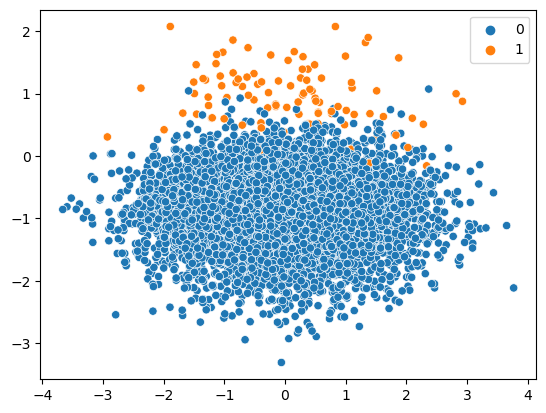

In [4]:
sns.scatterplot(x=x[:,3], y=x[:,4], hue=y) # hue : 범주형 데이터별로 색을 다르게 표시 
plt.show()

## Under Sampling 

### RandomUnderSampling

In [12]:
# sampling_strategy='majority' : 다수 집단에서 샘플링하여 소수 집단의 수와 동일하게 맞춘다.
under_sample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = under_sample.fit_resample(x,y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


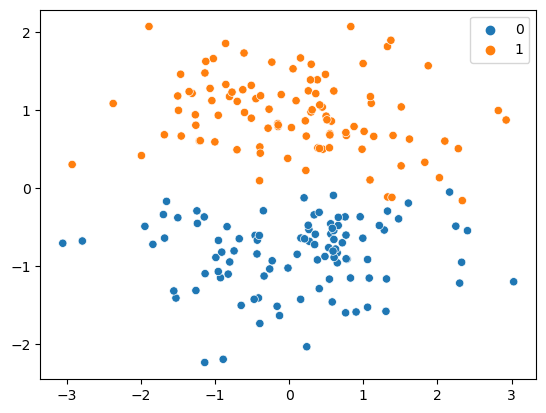

In [10]:
sns.scatterplot(x=x_under[:,3], y=x_under[:,4], hue=y_under) # hue : 범주형 데이터별로 색을 다르게 표시 
plt.show()

In [6]:
# sampling_strategy의 값을 0~1 사이의 값으로 지정하면 (소수 집단 데이터 수 /다수 집단 데이터 수)의 비율 값으로 다수 집단 데이터에서 샘플링된다. 
# ex) 0.4 = 100/250(다수 집단 데이터 수)
under_sample = RandomUnderSampler(sampling_strategy=0.4)
x_under, y_under = under_sample.fit_resample(x,y)
print(Counter(y_under))

Counter({0: 250, 1: 100})


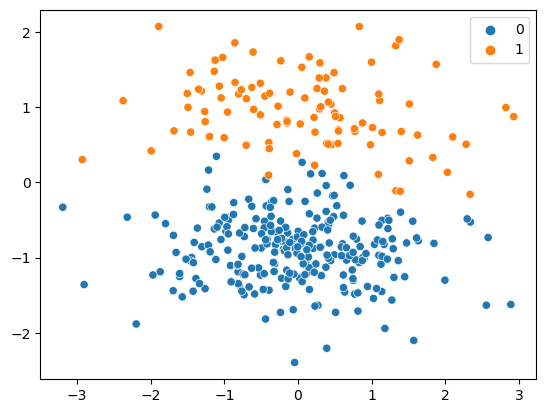

In [7]:
sns.scatterplot(x = x_under[:,3], y =x_under[:,4], hue=y_under)
plt.show()

### Tomek Link
- sampling_strategy 파라메터 값
>- 'majority' : 다수 집단 데이터만 리샘플링
>- 'not majority' : 다수 집단을 제외한 나머지 범주 데이터를 리샘플링
>- 'not minority' : 소수 집단을 제외한 나머지 범주 데이터를 리샘플링
>- 'all' : 모든 범주 데이터를 리샘플링
>- 'auto' : 'not minority'와 동일

In [10]:
tomek_link = TomekLinks(sampling_strategy='auto')
x_under, y_under = tomek_link.fit_resample(x,y)
print(Counter(y_under))

Counter({0: 9892, 1: 100})


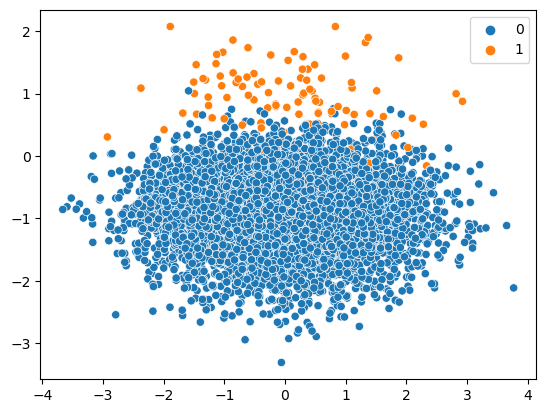

In [11]:
sns.scatterplot(x = x_under[:,3], y =x_under[:,4], hue=y_under)
plt.show()

## Over Sampling

### Random Over Sampling

In [13]:
over_sample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = over_sample.fit_resample(x,y)
print(Counter(y_over))

Counter({0: 9900, 1: 9900})


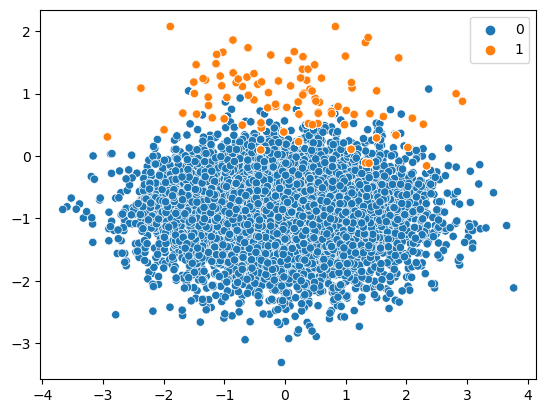

In [14]:
# 동일 데이터를 반복적으로 복제해서 만들었기 때문에 산점도가 원본 데이터와 같아 보인다.
sns.scatterplot(x = x_over[:,3], y =x_over[:,4], hue=y_over)
plt.show()

### SMOTE

In [15]:
# sampling_strategy=0.4 : 다수 클래스 샘플 수(9900개) * 0.4 = 3960(소수 클래스 샘플 수)
smote_sample = SMOTE(sampling_strategy=0.4)
x_over, y_over = smote_sample.fit_resample(x,y)
print(Counter(y_over))

Counter({0: 9900, 1: 3960})


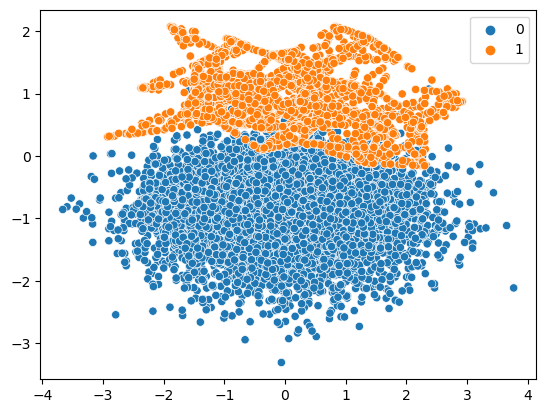

In [16]:
sns.scatterplot(x = x_over[:,3], y =x_over[:,4], hue=y_over)
plt.show()

## Cost Sensitive Learning
- 라벨 가중치 옵션 사용
- class_weight 옵션
>- {클래스:가중치 값}

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(x, y, model):
    cv = RepeatedStratifiedKFold(n_splits=5, random_state=1) # 5번 분할해서 5번의 교차검증 수행
    scores = cross_val_score(model, x, y, scoring='precision', cv=cv, n_jobs=-1) # n_jobs : 멀티 코어를 사용하는 경우 멀티 코어를 다 활용해서 검증해라
    return scores

model = RandomForestClassifier(n_estimators=100)
scores = evaluate_model(x, y, model)
# 가중치를 주지 않고 학습 -> 평균 정밀도 확인
print(f'Mean Precision No Weight: {np.mean(scores):.3f}')

weights = {0:1, 1:80} # 0번 : 다수클래스, 1번 : 소수클래스
model = RandomForestClassifier(n_estimators=100, class_weight=weights)
scores = evaluate_model(x, y, model)
# 가중치를 주고 학습 -> 평균 정밀도 확인
print(f'Mean Precision Weight: {np.mean(scores):.3f}')

Mean Precision No Weight: 0.909
Mean Precision Weight: 0.920
